In [27]:
# 192号 118号

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[16]))

In [29]:
data_day = data_day[data_day.Direction == 1.0]

In [30]:
data = data_day.loc[:, ['Bus_Service_Number', 'Boarding_stop_stn',
                        'Ride_start_date', 'Ride_start_time', 'Ride_end_date', 'Ride_end_time']]

data = data[(data.Ride_start_time >= "05:30:00") &
            (data.Ride_start_time < "23:45:00")]

In [31]:
data['a'] = ' '
data.Ride_start_time = pd.to_datetime(
    data.Ride_start_date+data.a+data.Ride_start_time)
data.Ride_end_time = pd.to_datetime(
    data.Ride_end_date+data.a+data.Ride_end_time)

In [32]:
data_temp = data.copy()

In [33]:
data_temp.head(5)

,Bus_Service_Number,Boarding_stop_stn,Ride_start_date,Ride_start_time,Ride_end_date,Ride_end_time,a
0,184,12101,2017-01-17,2017-01-17 15:59:49,2017-01-17,2017-01-17 16:19:56,
1,184,43049,2017-01-17,2017-01-17 08:28:08,2017-01-17,2017-01-17 08:47:59,
2,184,12101,2017-01-17,2017-01-17 15:44:10,2017-01-17,2017-01-17 15:50:07,
3,184,44229,2017-01-17,2017-01-17 12:27:20,2017-01-17,2017-01-17 12:49:07,
4,184,44229,2017-01-17,2017-01-17 09:30:44,2017-01-17,2017-01-17 09:34:13,


In [34]:
data_temp = data_temp.sort_values('Ride_start_time')
data_temp.set_index('Ride_start_time', inplace=True)

In [35]:
index_16th = pd.date_range(start='2017-01-17 05:30',
                           end='2017-01-17 23:30', freq='15T')
index_16th_data = pd.DataFrame(index=index_16th, columns=['num'], data=0)

In [36]:
# data_server_1

In [37]:
# import matplotlib.font_manager as fm

# # 列出所有可用字体
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(font)

公交线路192号
公交站点84049号


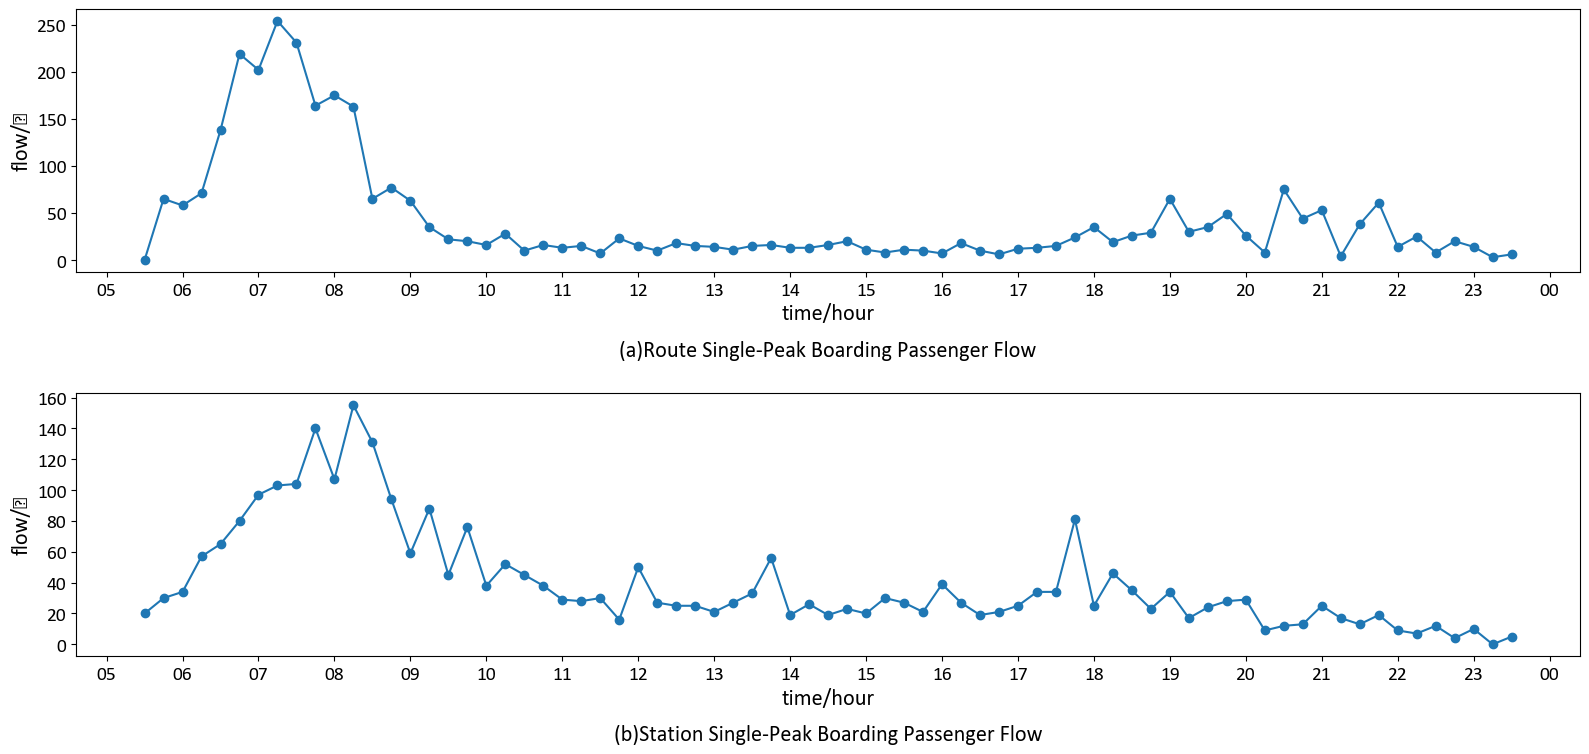

In [38]:
import matplotlib.font_manager as fm
import warnings
from datetime import datetime, timedelta
import matplotlib.dates as mdates
# 设置显示warning
warnings.filterwarnings('ignore')  # 或者使用 'default' 来恢复默认行为
# 查找并使用系统中的 Calibri 字体
font_path = '/Users/kevinableyyyx/Library/Fonts/Calibri.ttf'  # 替换为实际路径
my_font = fm.FontProperties(fname=font_path)

server_1 = []
server_2 = []


data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '192']
data_server_1.loc[:, 'num'] = 1
result_df = data_server_1.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_1 = result_all['num'].to_list()
print("公交线路{}号".format(192))

data_server_2 = data_temp.loc[data_temp['Boarding_stop_stn'] == 84049]
data_server_2.loc[:, 'num'] = 1
result_df = data_server_2.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_2 = result_all['num'].to_list()
print("公交站点{}号".format(84049))


fig = plt.figure(figsize=(16, 7))


plt.subplot(2, 1, 1)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_1, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('时间/hour',fontsize=16)
plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/次', fontsize=16, fontproperties=my_font)
plt.title('(a)Route Single-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.subplot(2, 1, 2)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_2, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/次', fontsize=16, fontproperties=my_font)
plt.title('(b)Station Single-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.show()

fig.savefig('./线路和站点单峰上车客流量_new.svg', bbox_inches='tight')

公交线路192号
公交站点84049号


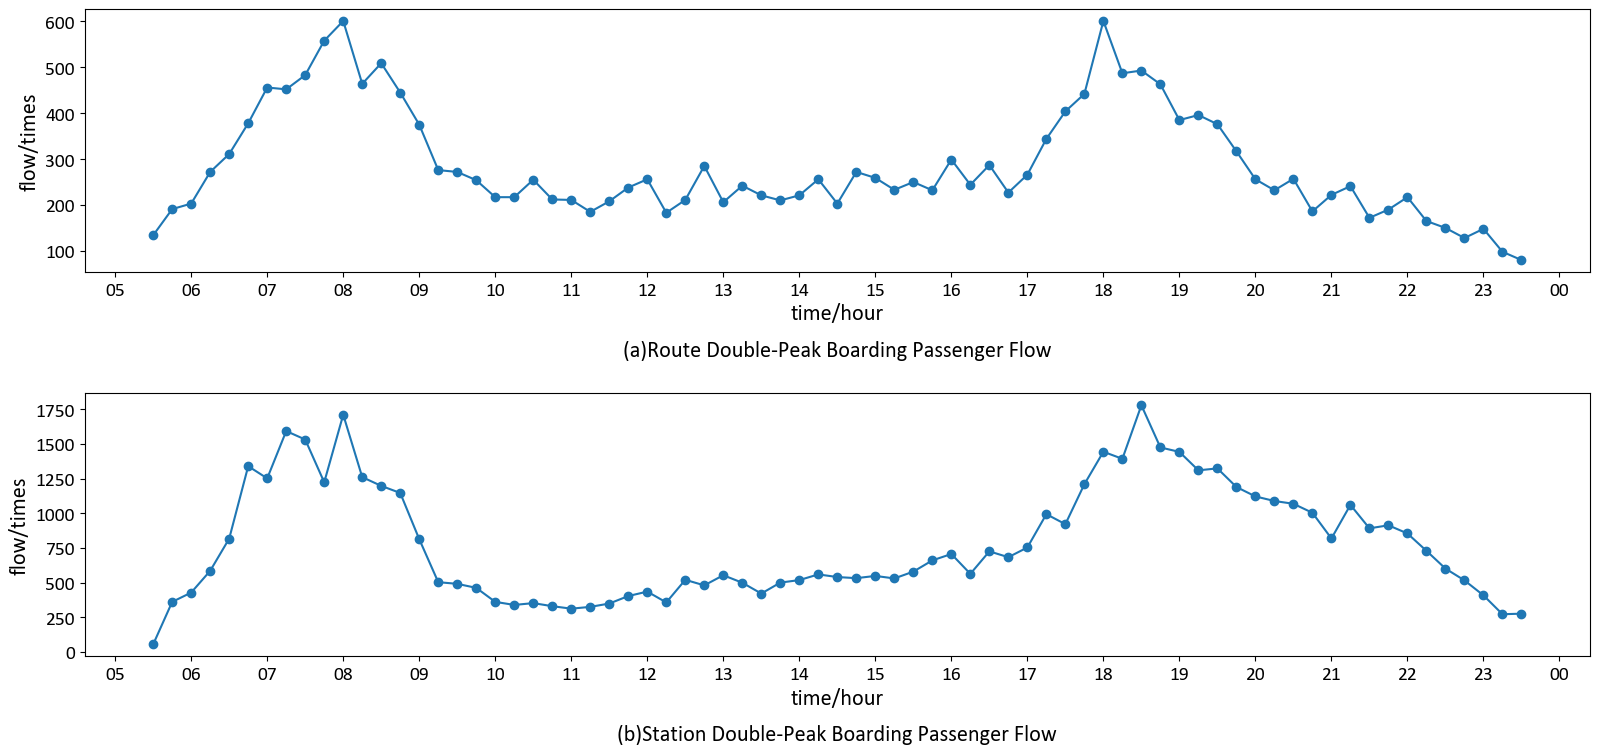

In [39]:
import warnings
from datetime import datetime, timedelta
import matplotlib.dates as mdates
# 设置显示warning
warnings.filterwarnings('ignore')  # 或者使用 'default' 来恢复默认行为
plt.rcParams['font.sans-serif'] = 'Calibri'
server_1 = []
server_2 = []


data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '24']
data_server_1.loc[:, 'num'] = 1
result_df = data_server_1.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_1 = result_all['num'].to_list()
print("公交线路{}号".format(192))

data_server_2 = data_temp.loc[data_temp['Boarding_stop_stn'] == 22009]
data_server_2.loc[:, 'num'] = 1
result_df = data_server_2.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_2 = result_all['num'].to_list()
print("公交站点{}号".format(84049))


fig = plt.figure(figsize=(16, 7))


plt.subplot(2, 1, 1)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_1, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('时间/hour',fontsize=16)
plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/times', fontsize=16, fontproperties=my_font)
plt.title('(a)Route Double-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.subplot(2, 1, 2)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_2, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/times', fontsize=16, fontproperties=my_font)
plt.title('(b)Station Double-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.show()

fig.savefig('./线路和站点双峰上车客流量_new.svg', bbox_inches='tight')

公交线路192号
公交站点84049号


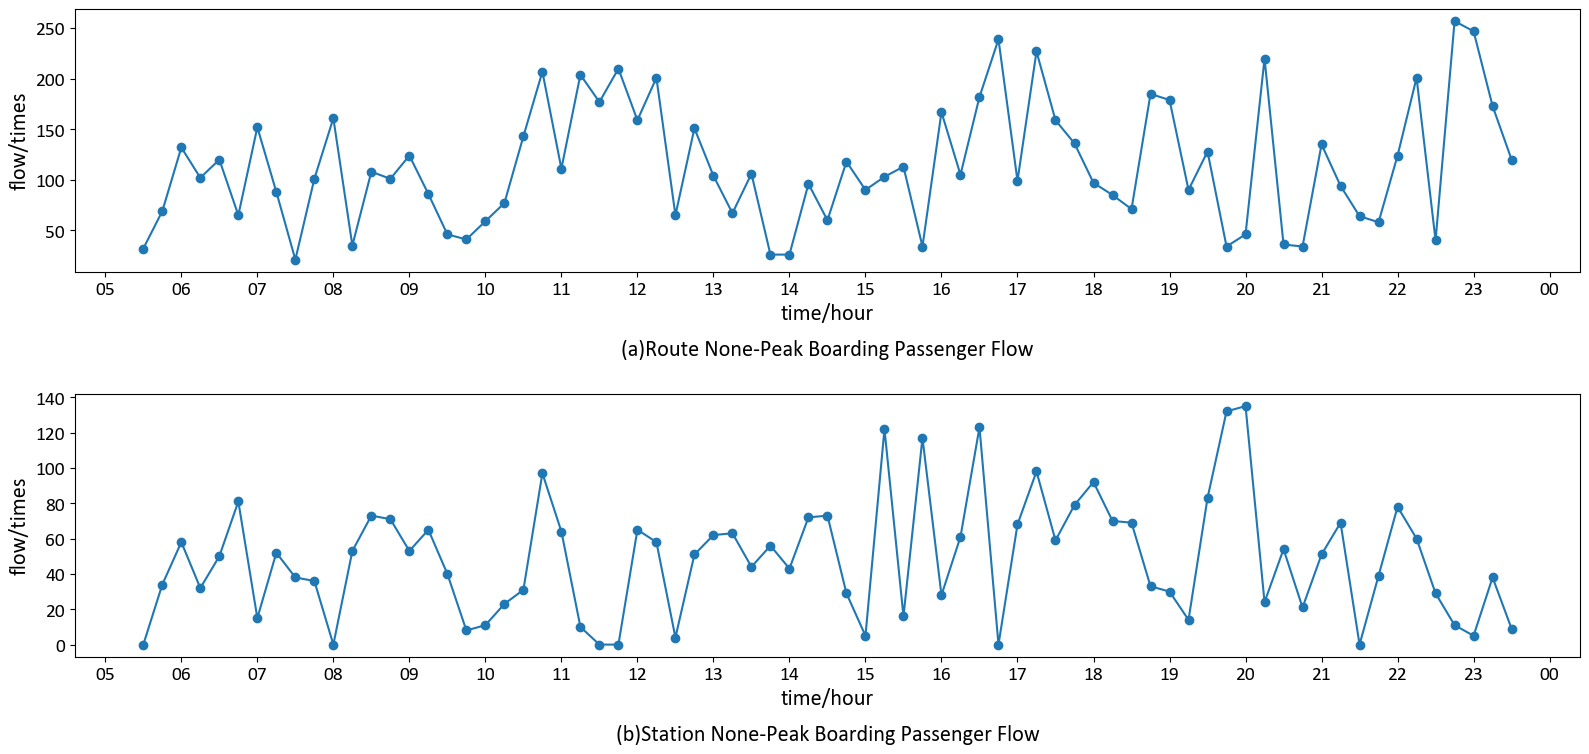

In [40]:
import warnings
from datetime import datetime, timedelta
import matplotlib.dates as mdates
# 设置显示warning
warnings.filterwarnings('ignore')  # 或者使用 'default' 来恢复默认行为

server_1 = []
server_2 = []


data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '170']
data_server_1.loc[:, 'num'] = 1
result_df = data_server_1.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_1 = result_all['num'].to_list()
print("公交线路{}号".format(192))

data_server_2 = data_temp.loc[data_temp['Boarding_stop_stn'] == 46219]
data_server_2.loc[:, 'num'] = 1
result_df = data_server_2.resample('15T').count()
result_all = index_16th_data.add(result_df, fill_value=0)
server_2 = result_all['num'].to_list()
print("公交站点{}号".format(84049))


fig = plt.figure(figsize=(16, 7))


plt.subplot(2, 1, 1)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_1, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/times', fontsize=16, fontproperties=my_font)
plt.title('(a)Route None-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.subplot(2, 1, 2)
# 设置横轴刻度格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# 设置横轴刻度为五分钟间隔
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.plot(index_16th, server_2, marker='o', linestyle='-')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time/hour', fontsize=16, fontproperties=my_font)
plt.ylabel('flow/times', fontsize=16, fontproperties=my_font)
plt.title('(b)Station None-Peak Boarding Passenger Flow',
          y=-0.35, fontproperties=my_font, fontsize=16)

plt.show()

fig.savefig('./线路和站点无峰上车客流量_new.svg', bbox_inches='tight')